# reading the datasets
importing the necessairy libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import dask
import dask.dataframe as dd
import datetime as dt
import warnings
import seaborn as sn
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 100
pd.options.display.max_columns = None

In [2]:

train = pd.read_csv("C:/Users/ASUS/Desktop/internship_project/train_ver21.csv")
test = pd.read_csv("C:/Users/ASUS/Desktop/internship_project/test_ver21.csv")


In [3]:
#inspecting the data
train.head(5)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
print("dataset summary :\n")
train.info()
print("description :\n")
train.describe(include='all').T

dataset summary :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 2

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fecha_dato,13647309,17,2016-05-28,931453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ncodpers,13647309.0,NaN,NaN,NaN,834904.211501,431565.025784,15889.0,452813.0,931893.0,1199286.0,1553689.0
ind_empleado,13619575,5,N,13610977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pais_residencia,13619575,118,ES,13553710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sexo,13619505,2,V,7424252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,13647309.0,235.0,23.0,542682.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha_alta,13619575,6756,2014-07-28,57389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ind_nuevo,13619575.0,NaN,NaN,NaN,0.059562,0.236673,0.0,0.0,0.0,0.0,1.0
antiguedad,13647309.0,507.0,0.0,134335.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
indrel,13619575.0,NaN,NaN,NaN,1.178399,4.177469,1.0,1.0,1.0,1.0,99.0


Our data looks considerably trustable with no unreasonably high or low values with the excception of some missing values and 2 almost empty featues that needs to be dropped

Almost all features have relatively high standard deviation which concludes the diversity of our massive amount of data

# data cleaning and preprocessing:

In [5]:
#changing column names
col_names = {"fecha_dato":"fetch_date","ncodpers":"cust_id", "ind_empleado":"emp_index","pais_residencia":"residence",
            "sexo":"sex","fecha_alta":"first_date","ind_nuevo":"new_cust","antiguedad":"seniority",
            "indrel":"is_primary","ult_fec_cli_1t":"last_primary_date","indrel_1mes":"cust_type",
            "tiprel_1mes":"cust_rel_type","indresi":"residence_index","indext":"foreigner_index",
            "conyuemp":"spouse_index","canal_entrada":"channel","indfall":"deceased",
             "tipodom":"address_type","cod_prov":"province","nomprov":"province_name",
             "ind_actividad_cliente":"active_index","renta":"income","segmento":"segment",

             "ind_ahor_fin_ult1":'savings_account',"ind_aval_fin_ult1" :'guarentees',"ind_cco_fin_ult1": 'current_account',
             "ind_cder_fin_ult1":'derivative_account', "ind_cno_fin_ult1":'payroll_account', "ind_ctju_fin_ult1":'junior_account',
             "ind_ctma_fin_ult1" :'mas_account',"ind_ctop_fin_ult1":'perticular_account',"ind_ctpp_fin_ult1": 'perticular_plus',
             "ind_deco_fin_ult1" :'st_deposit', "ind_deme_fin_ult1":'mt_deposits', "ind_dela_fin_ult1":'lt_deposits',
             "ind_ecue_fin_ult1":'e_account',"ind_fond_fin_ult1": 'funds',"ind_hip_fin_ult1": 'mortgage',
             "ind_plan_fin_ult1":'pension',"ind_pres_fin_ult1" :'loan',"ind_reca_fin_ult1": 'tax', "ind_tjcr_fin_ult1":'credit_card',
             "ind_valo_fin_ult1": 'securities',"ind_viv_fin_ult1": 'home_account',"ind_nomina_ult1":'payroll', "ind_nom_pens_ult1":'pension2',
             "ind_recibo_ult1": 'direct_debit'
             }
col_names2 = {"fecha_dato":"fetch_date","ncodpers":"cust_id", "ind_empleado":"emp_index","pais_residencia":"residence",
            "sexo":"sex","fecha_alta":"first_date","ind_nuevo":"new_cust","antiguedad":"seniority",
            "indrel":"is_primary","ult_fec_cli_1t":"last_primary_date","indrel_1mes":"cust_type",
            "tiprel_1mes":"cust_rel_type","indresi":"residence_index","indext":"foreigner_index",
            "conyuemp":"spouse_index","canal_entrada":"channel","cod_prov":"province","nomprov":"province_name",
            "ind_actividad_cliente":"active_index","renta":"income","segmento":"segment"}

train.rename(col_names, axis = 1, inplace = True)
test.rename(col_names2, axis = 1, inplace = True)

#data type correction
train.age=pd.to_numeric(train.age,errors='coerce')
train.income=pd.to_numeric(train.income,errors='coerce')
train.seniority = pd.to_numeric(train.seniority, errors='coerce')
train.first_date = pd.to_datetime(train.first_date, errors = 'coerce')

train['fetch_date'] = pd.to_datetime(train['fetch_date'])

test.age = pd.to_numeric(test.age, errors='coerce')
test.income = pd.to_numeric(test.income, errors='coerce')
test.seniority = pd.to_numeric(test.seniority, errors='coerce')
test.first_date = pd.to_datetime(test.first_date, errors = 'coerce')
test['fetch_date'] = pd.to_datetime(test['fetch_date'])

In [6]:
print("% of na or null values per feature:\n")
print(train.isnull().sum()/train.shape[0] * 100)

% of na or null values per feature:

fetch_date             0.000000
cust_id                0.000000
emp_index              0.203220
residence              0.203220
sex                    0.203732
age                    0.203220
first_date             0.203220
new_cust               0.203220
seniority              0.203220
is_primary             0.203220
last_primary_date     99.818330
cust_type              1.097513
cust_rel_type          1.097513
residence_index        0.203220
foreigner_index        0.203220
spouse_index          99.986752
channel                1.363829
deceased               0.203220
address_type           0.203227
province               0.685784
province_name          0.685784
active_index           0.203220
income                20.475648
segment                1.387585
savings_account        0.000000
guarentees             0.000000
current_account        0.000000
derivative_account     0.000000
payroll_account        0.000000
junior_account         0.000000
mas

**missing values handling:**

we will impute data by 3 ways depending on the % of missing values in that feature


In [7]:
# for features with missing values percentage < 10% we use the most common value
cols = ['emp_index','residence','sex','first_date','new_cust','is_primary',"cust_type","seniority","cust_rel_type",
        "province","province_name","active_index","channel","segment","payroll",
        "pension2", "deceased","address_type","age","residence_index","foreigner_index"]
cols2=['emp_index','residence','sex','first_date','new_cust','is_primary',"cust_type","cust_rel_type",
        "province","province_name","active_index","channel"]
for i in cols:
    train.loc[train[i].isnull(), i] = train[i].value_counts().index[0]
for i in cols2:
    test.loc[test[i].isnull(), i] = test[i].value_counts().index[0]

# for features with missing values percentage > 10% we use the mean at different dimensions
train['income'].fillna(train['income'].mean(), inplace = True)
test['income'].fillna(test['income'].mean(), inplace = True)

# for features with missing values percentage >99% we drop the column
train.drop(['last_primary_date','spouse_index'], axis = 1, inplace = True)
test.drop(['last_primary_date','spouse_index'], axis = 1, inplace = True)
train['payroll']=train['payroll'].astype('int64')
train['pension2']=train['pension2'].astype('int64')
print("% of na or null values per feature:\n")
print(train.isnull().sum()/train.shape[0] * 100)

% of na or null values per feature:

fetch_date            0.0
cust_id               0.0
emp_index             0.0
residence             0.0
sex                   0.0
age                   0.0
first_date            0.0
new_cust              0.0
seniority             0.0
is_primary            0.0
cust_type             0.0
cust_rel_type         0.0
residence_index       0.0
foreigner_index       0.0
channel               0.0
deceased              0.0
address_type          0.0
province              0.0
province_name         0.0
active_index          0.0
income                0.0
segment               0.0
savings_account       0.0
guarentees            0.0
current_account       0.0
derivative_account    0.0
payroll_account       0.0
junior_account        0.0
mas_account           0.0
perticular_account    0.0
perticular_plus       0.0
st_deposit            0.0
mt_deposits           0.0
lt_deposits           0.0
e_account             0.0
funds                 0.0
mortgage              0.0
p

# Profiling customers

In [8]:

target_columns = ['savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus', 'st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit']

user_features = ['fetch_date', 'cust_id', 'emp_index', 'residence', 'sex', 'age', 'first_date', 'new_cust', 'seniority',
'indrel', 'is_primary', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index', 'spouse_index',
'channel', 'deceased', 'address_type', 'province','province_name', 'active_index', 'income', 'segment']


If a product is bought at once it is carried and mentioned in all the subsequent months, Lets change this format, Lets create a new dataframe where we keep it mentioned in only in the month its bought.

We will remove jan 2015 data as it carries all the purchases from the past

In [9]:
dummy = pd.DataFrame(
    {
        'cust_id': train['cust_id'].unique(),
        'fetch_date': pd.to_datetime('2014-12-28')
    }
)

new_purchases=pd.concat([train[['cust_id','fetch_date']+target_columns],dummy])


new_purchases['fetch_date'] = pd.to_datetime(new_purchases['fetch_date'])

new_purchases=new_purchases.fillna(0)
print(len(new_purchases))
new_purchases[target_columns]=new_purchases[target_columns].astype('uint8')
new_purchases=new_purchases.sort_values(['cust_id','fetch_date'])

vals=np.array(new_purchases[target_columns].values,dtype='int8')

vals[1:]=vals[1:]-vals[:-1]
new_purchases[target_columns]=vals
print("-"*100+"before merge1")
print(new_purchases.head(10))

# some of the products were discontinued so purchase value there becomes less than 0,
# as we are only interested in purchases we can remove them

for col in target_columns:
  new_purchases[col][new_purchases[col] < 0] = 0
# drop all the rows where no new purchase is made

new_purchases = new_purchases[(new_purchases[target_columns].sum(axis=1) > 0)]

columns_to_drop = ['savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account',
                   'junior_account', 'mas_account', 'perticular_account', 'perticular_plus', 'st_deposit',
                   'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage', 'pension', 'loan', 'tax',
                   'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit']

traindegg = train.drop(columns=columns_to_drop)
new_purchases = new_purchases[~new_purchases.fetch_date.isin(['2014-12-28','2015-01-28'])]
# Perform the merge
new_purchases = traindegg.merge(new_purchases, on=['cust_id','fetch_date'], how='right')
print('new_purchases info:')

new_purchases.info()
len(new_purchases)

14603954
----------------------------------------------------------------------------------------------------before merge1
         cust_id fetch_date  savings_account  guarentees  current_account  \
416965     15889 2014-12-28                0           0                0   
416965     15889 2015-01-28                0           0                1   
836224     15889 2015-02-28                0           0                0   
1673961    15889 2015-03-28                0           0                0   
1882060    15889 2015-04-28                0           0                0   
3144382    15889 2015-05-28                0           0                0   
3565837    15889 2015-06-28                0           0                0   
4078996    15889 2015-07-28                0           0                0   
5319234    15889 2015-08-28                0           0                0   
5705188    15889 2015-09-28                0           0                0   

         derivative_account  

547330

Some of the features are of the users which do not change with each purchase, We can make a dataset of those features

In [46]:
user_data = new_purchases.drop_duplicates(subset=['cust_id'], keep='last')[['cust_id', 'emp_index', 'residence', 'sex', 'age', 'first_date', 'new_cust', 'seniority',
                  'is_primary', 'cust_type', 'cust_rel_type', 'residence_index', 'foreigner_index',
                  'channel', 'deceased', 'address_type', 'province','province_name', 'active_index',
                  'income', 'segment']]
user_purchases = new_purchases[['cust_id']+target_columns].groupby(by='cust_id').sum()
print(user_purchases.head())
user_features = user_data.merge(user_purchases, on='cust_id', how='right')


         savings_account  guarentees  current_account  derivative_account  \
cust_id                                                                     
15889                  0           0                0                   0   
15891                  0           0                1                   0   
15892                  0           0                1                   0   
15894                  0           0                0                   0   
15896                  0           0                2                   0   

         payroll_account  junior_account  mas_account  perticular_account  \
cust_id                                                                     
15889                  0               0            0                   0   
15891                  0               0            0                   0   
15892                  0               0            0                   0   
15894                  3               0            0                   0  

**defining the plot functions that we will use to visualize and have a better understanding of our data**

In [11]:
def plot_distribution(series, plt_title, figsize, bins=14):
  plt.figure(figsize = figsize)
  plt.title(plt_title)
  series = np.array(series, dtype=int)
  sn.distplot(series, hist=True, bins=bins, kde=True, kde_kws={'bw':.2})
  plt.axvline(series.mean(),color='midnightblue',label='Mean')
  plt.axvline(np.median(series),color='blue',label='Median')
  plt.axvline(series.max(),color='indigo',label='Max')
  plt.axvline(series.min(),color='crimson',label='Min')
  plt.axvline(np.quantile(series, 0.25),color='red',label='First quartile - 25%')
  plt.axvline(np.quantile(series, 0.75),color='orangered',label='Third quartile - 75%')
  plt.legend()
  plt.show()

def stripplot(data, title, figsize):
  plt.figure(figsize=figsize)
  plt.title(title)
  y = data.columns[0]
  x = data.columns[1]
  sn.stripplot(x=x, y=y, data=data, jitter=False, dodge=True)
  sn.boxplot(x=x, y=y, data=data)
  plt.xticks(rotation = 90)
  plt.show()




def piecountplot(series, title):
  plt.title(title)
  series.value_counts().plot(kind='pie', autopct='%1.2f%%')
  plt.legend()

def piepurchaseplot(dictionary, title):
  plt.title(title)
  plt.pie(dictionary.values(), labels = dictionary.keys(), autopct='%1.2f%%')
  plt.legend()

def countplot(series, title, figsize):
  plt.figure(figsize=figsize)
  plt.title(title)
  sn.countplot(series)
  plt.show()

def barplot(series, title, figsize):
  plt.figure(figsize=figsize)
  plt.title(title)
  plt.bar(series.index, series.values, color="royalblue")
  plt.show()

def allplots(data, title, kind='countplot', figsize=(10,2.5)):
  if kind == 'countplot':
    countplot(data, title, figsize)
  elif kind == 'piecountplot':
    piecountplot(data, title)
  elif kind == 'dist_plot':
    plot_distribution(data, title, figsize)
  elif kind == 'barplot':
    barplot(data, title, figsize)
  elif kind == 'piepurchaseplot':
    piepurchaseplot(data, title)
  elif kind == 'stripplot':
    stripplot(data, title, figsize)


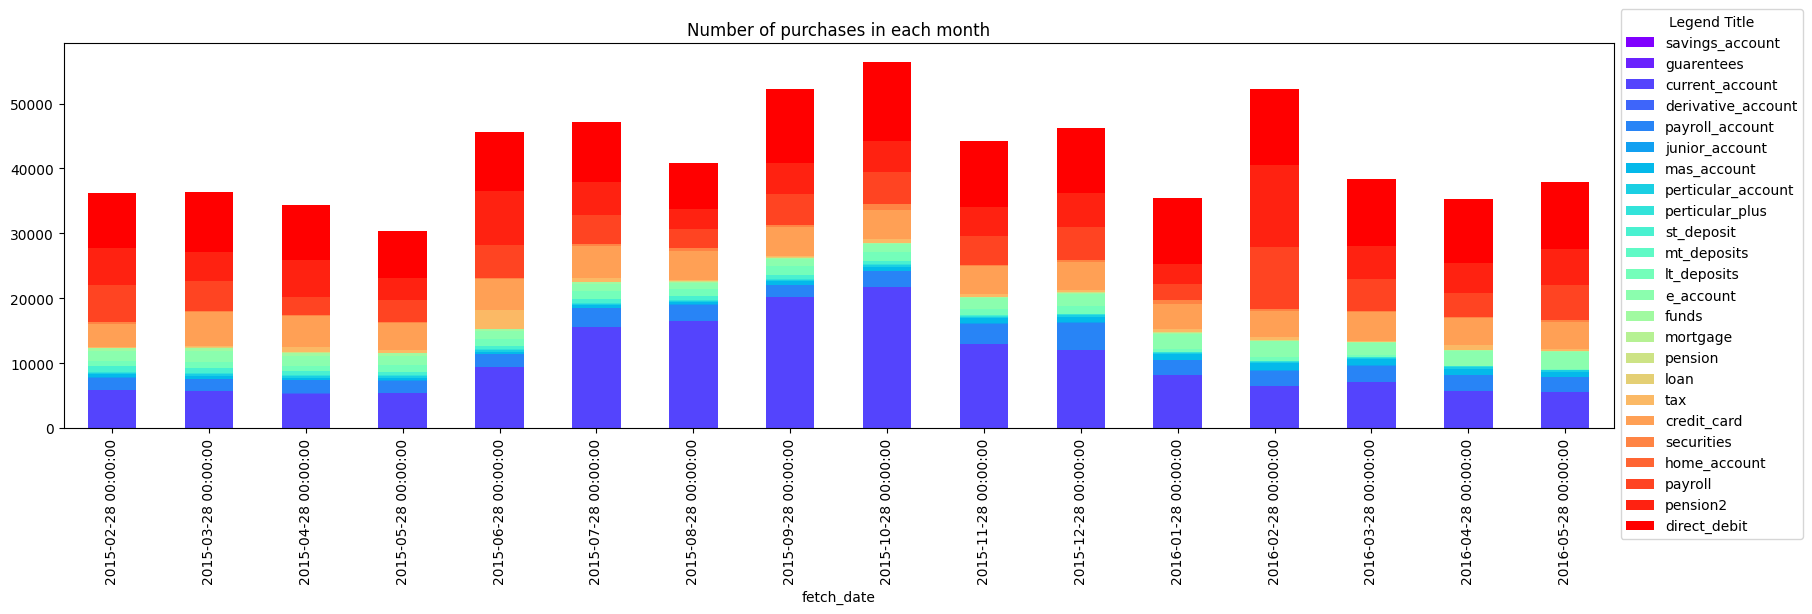

------------------------------------------------------------------------------------------------------------------------------------------------------


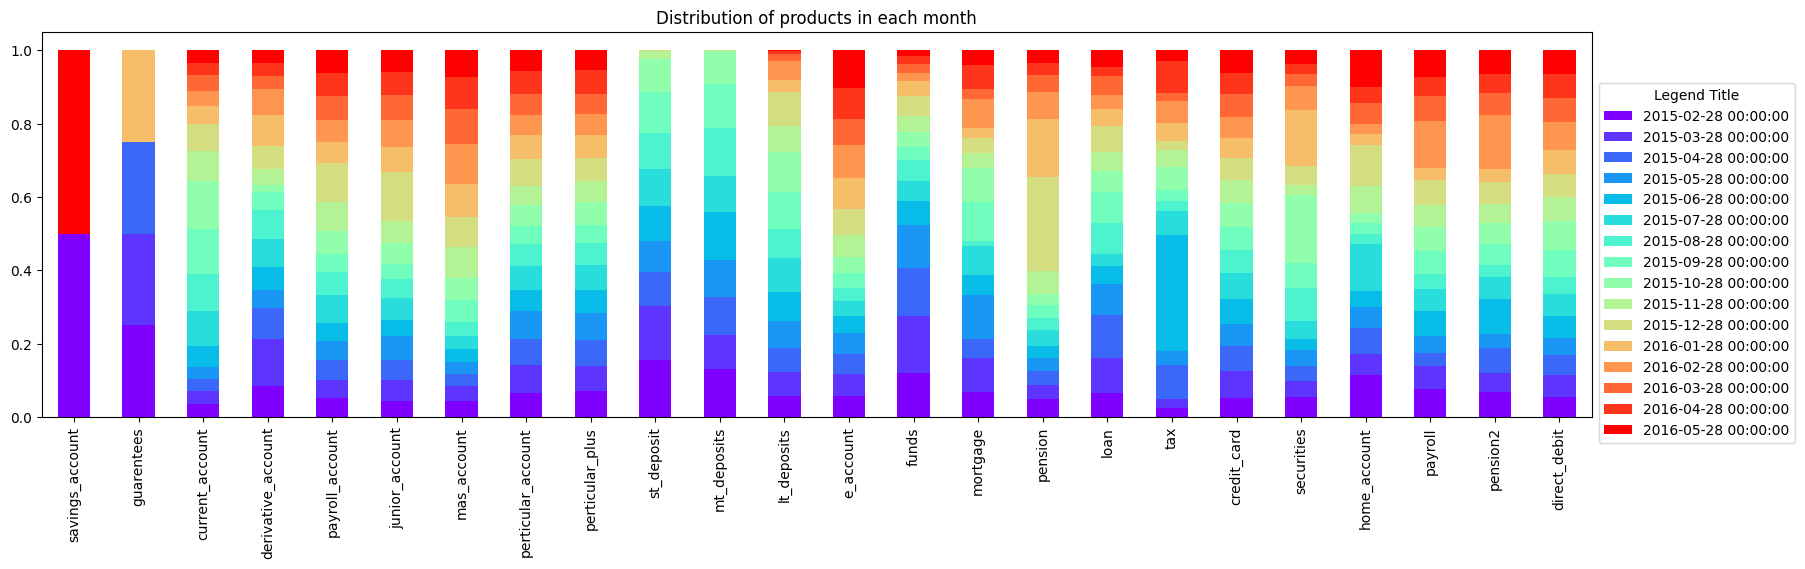

In [12]:
dummy = new_purchases[['fetch_date']+target_columns].groupby('fetch_date').sum()
dummy.plot(kind='bar',stacked=True, colormap='rainbow',figsize=(20,5))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Number of purchases in each month')
plt.show()
print('-'*150)
#Plotting the distribution of products in each month
dummy = new_purchases[['fetch_date']+target_columns].groupby('fetch_date').sum()
dummy = dummy/dummy.sum()
dummy = dummy.T
dummy.plot(kind='bar',stacked=True, colormap='rainbow',figsize=(20,5))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Distribution of products in each month')
plt.show()

* We can observe some purchase trends in this chart.

* There are only few purchases for savings account and guarentees.

* Products which have more blue shades like short term deposits(st_deposits).and mid term term deposits were bought in 2015, and their popularity went on to decrease in 2016.

* Tax account was created the most in the time of october.

* Pension account was created the most in the month of december.

* products like funds and long term deposits have lost their popularity over the time.


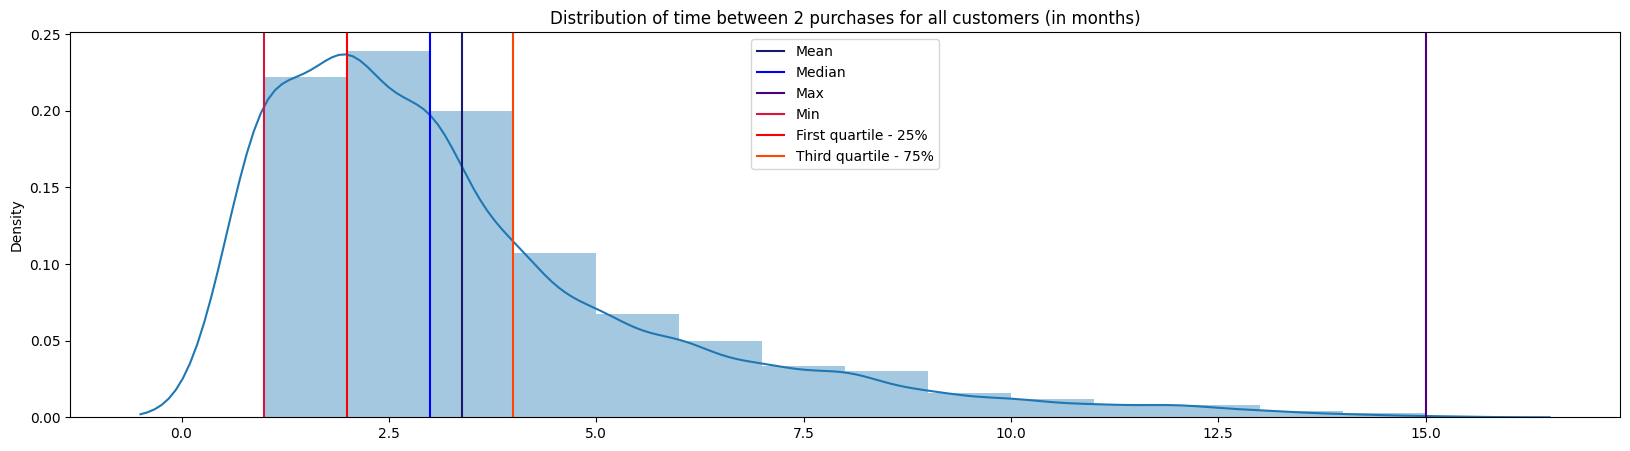


 On an average a person buys a product every 3 Months


In [13]:
dummy = new_purchases.copy()

dummy = new_purchases[new_purchases[target_columns].sum(axis=1)>0]
dummy = dummy.sort_values(['cust_id', 'fetch_date'])
dates = new_purchases.fetch_date.unique()


dates=sorted(list(dates))
dates=pd.to_datetime(dates)


d = dict(zip(dates, range(dates.shape[0])))
dummy['month'] = dummy.fetch_date.map(d)

dummy = dummy[['cust_id', 'month']][1:] - dummy[['cust_id', 'month']].shift(1)[1:]  #Get the difference
dummy = dummy[dummy.cust_id == 0] #Remove all the records where difference between cust codes is not zero as it would be of different customers

#Plot distribution
plt_title = 'Distribution of time between 2 purchases for all customers (in months)'
plot_distribution(dummy.month, plt_title, figsize=(20,5))
print('\n On an average a person buys a product every {} Months'.format(int(dummy.month.median())))

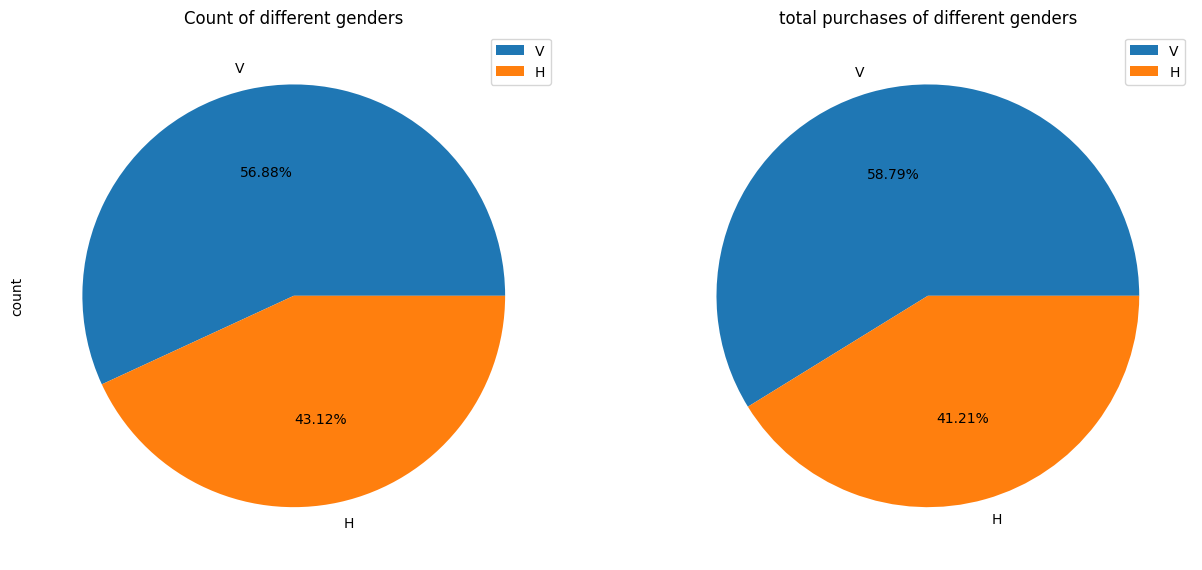

------------------------------------------------------------------------------------------------------------------------------------------------------


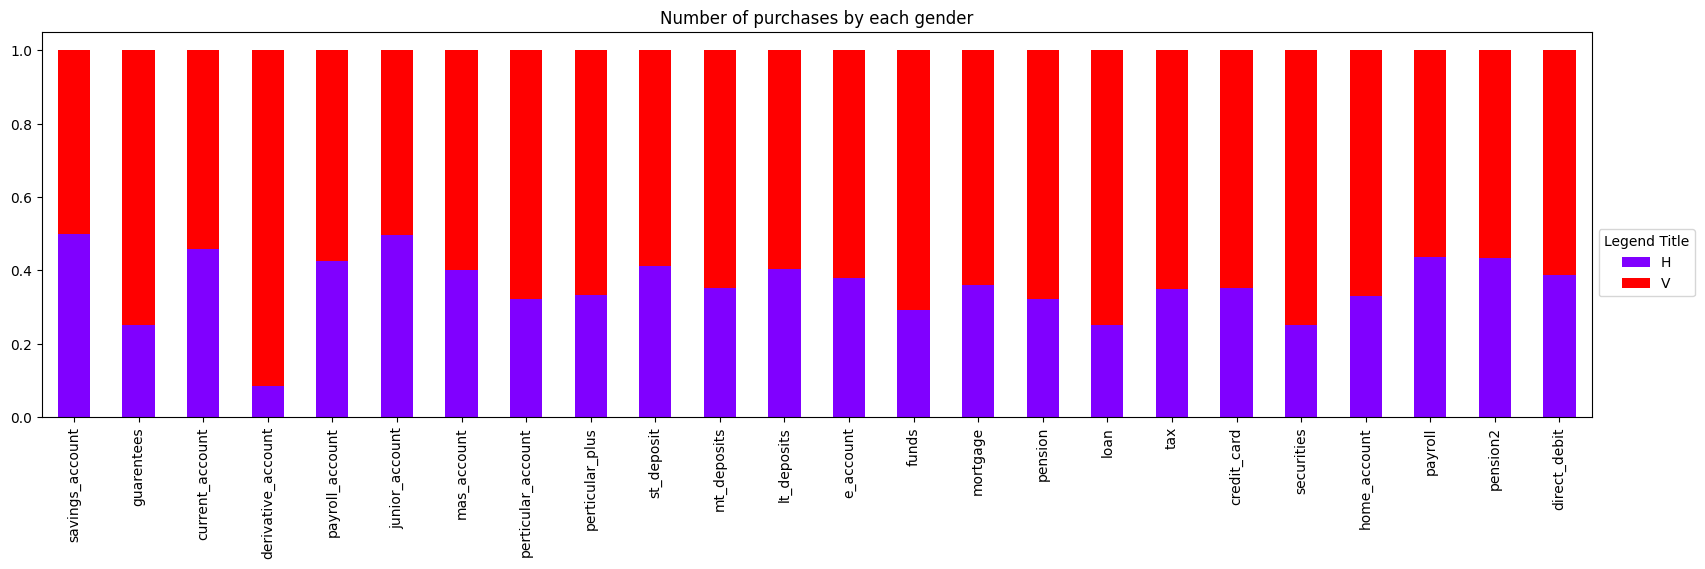

In [14]:
#Plotting the distribution of customers based on their sex
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
title = 'Count of different genders'
allplots(data = user_features.sex, title = title, kind='piecountplot')
plt.subplot(1,2,2)
user_features1=user_features[['sex','cust_id']+target_columns]
gender_purchases = user_features1.groupby('sex').sum()[target_columns].sum(axis=1)
gender_purchases = dict(zip(gender_purchases.index[::-1], np.array(gender_purchases.values, dtype=int)[::-1]))
title = 'total purchases of different genders'
allplots(data = gender_purchases, title = title, kind='piepurchaseplot')
plt.show()
print('-'*150)

#Plotting the number of purchases by each gender
dummy = user_features1.drop('cust_id', axis=1).groupby('sex')[target_columns].sum()
dummy = (dummy/dummy.sum()).T
dummy.plot(kind='bar',stacked=True, colormap='rainbow',figsize=(20,5))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Number of purchases by each gender')
plt.show()

* We can see that females constitutes to have bought more products on an average than males
* We can see the gender distribution in derivative account is very skewed, Where only women gender has bought most of the products.
* All the show almost same ration of gender participation and female gender is dominent in all product purchases

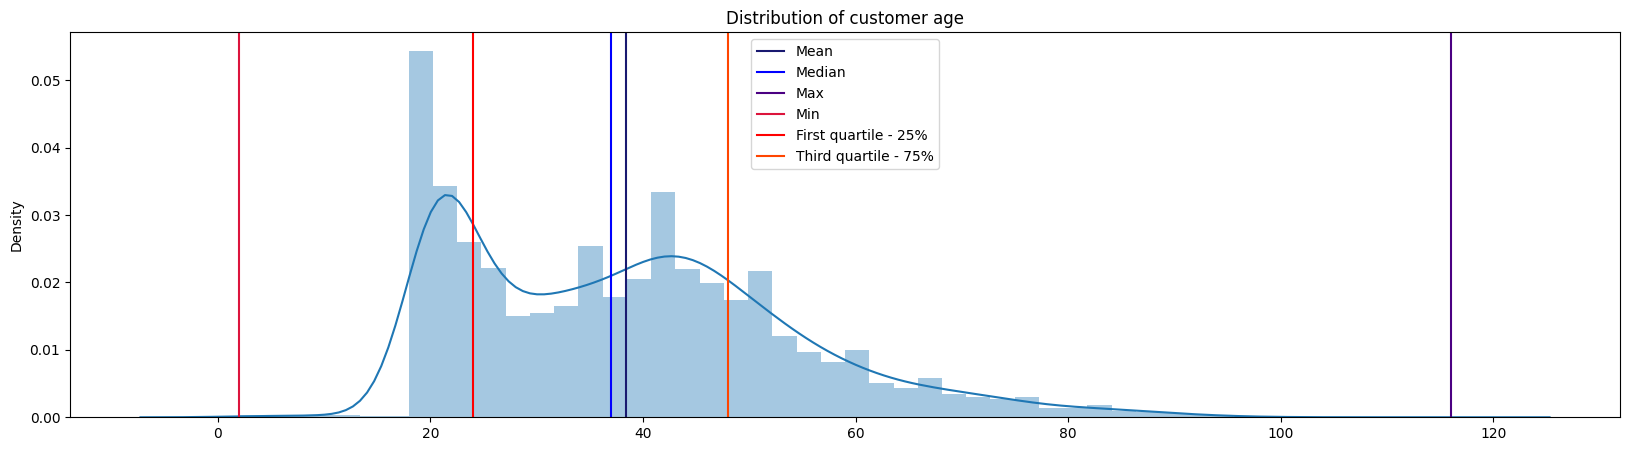

------------------------------------------------------------------------------------------------------------------------------------------------------


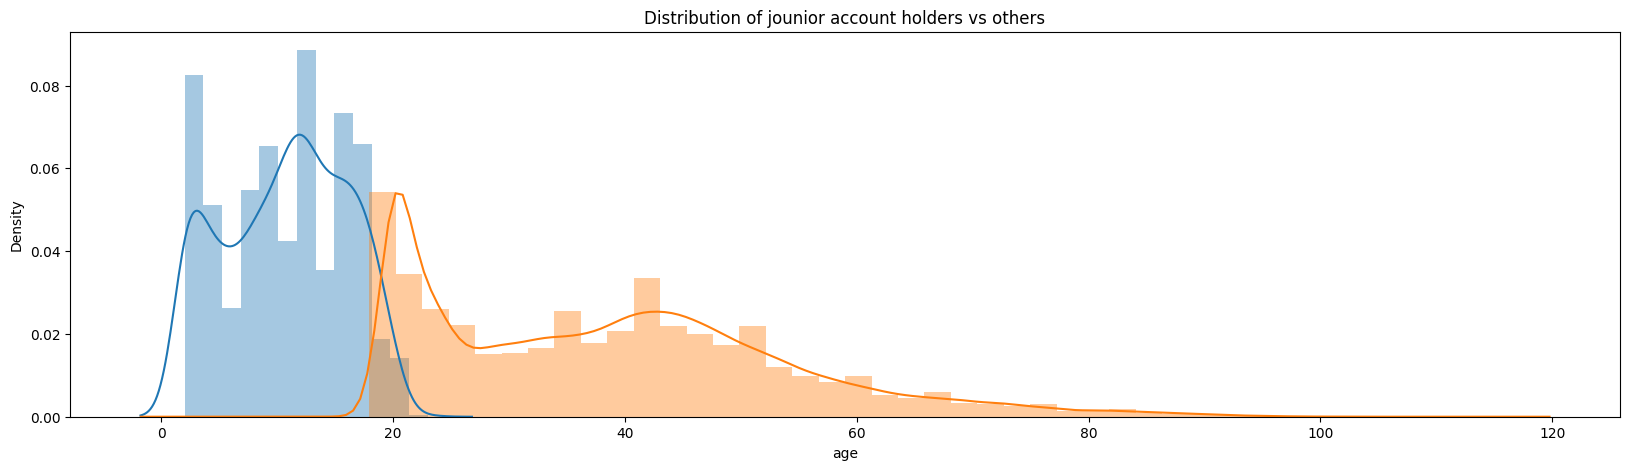

Among the customers aged below 20, 25.15% customers have bought jounior account
----------------------------------------------------------------------------------------------------


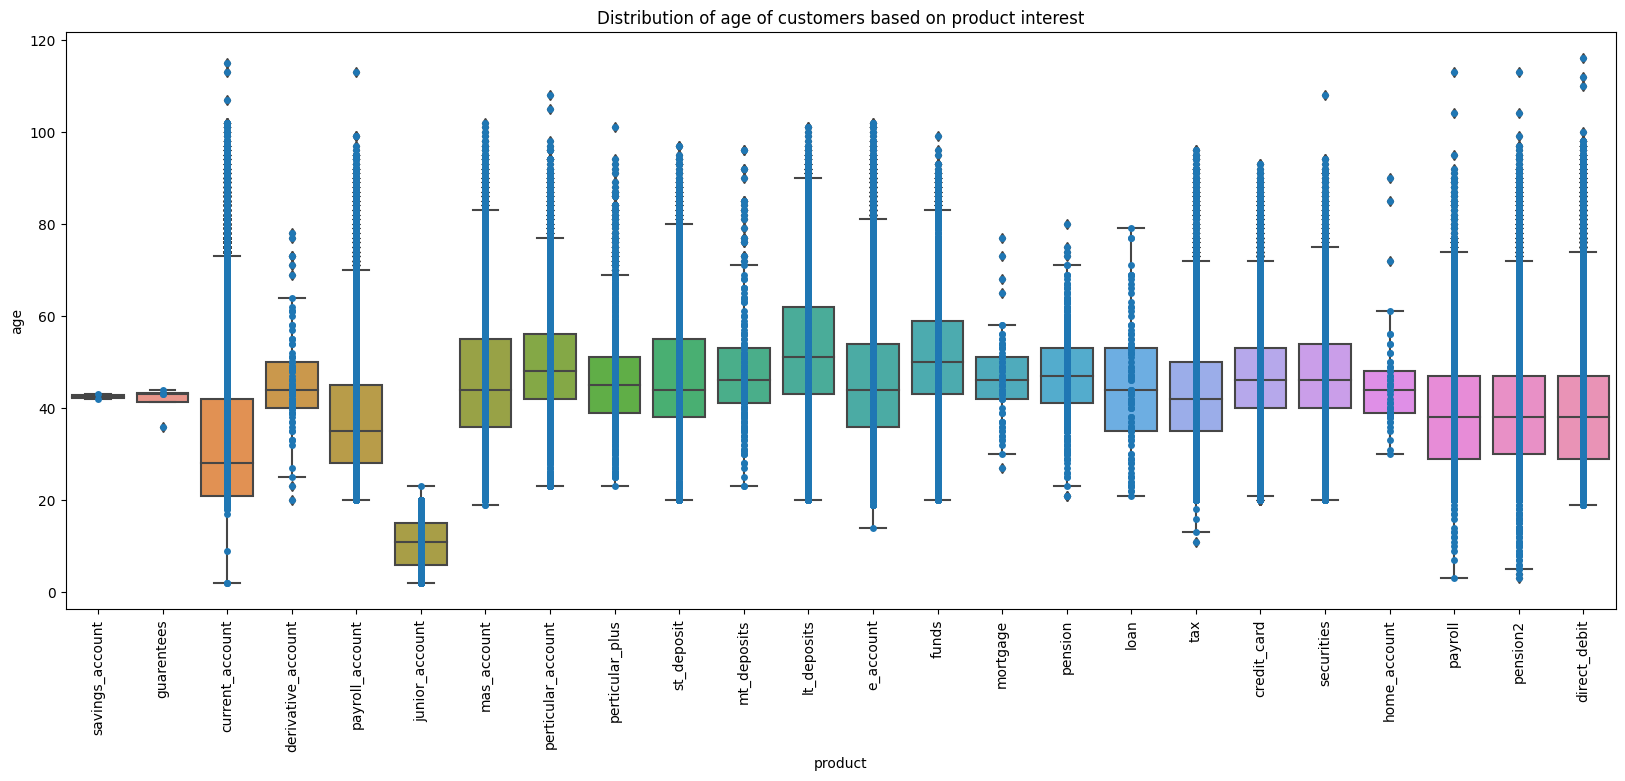

In [15]:
plt_title = 'Distribution of customer age'
plot_distribution(user_features.age, plt_title, figsize=(20,5), bins=50)

print('-'*150)
#Compute a dummy pandas dataframe from dask dataframe (We can not perform group by or assign values to dask dataframe)
juniorage = user_features[user_features.junior_account > 0].age
#Compute a dummy pandas dataframe from dask dataframe (We can not perform group by or assign values to dask dataframe)
middlegaed = user_features[user_features.junior_account == 0].age

#Plottingg distribution of jounior account holders vs others
plt.figure(figsize=(20,5))
plt.title('Distribution of jounior account holders vs others')
sn.distplot(juniorage)
sn.distplot(middlegaed)
plt.show()
print('Among the customers aged below 20, {:.2f}% customers have bought jounior account'
      .format(100*len(user_features[(user_features.age<20) & (user_features.junior_account > 0)])/ len(user_features[(user_features.age<20)])))

print('-'*100)

dummy = pd.DataFrame(columns=['age', 'product'])
for col in target_columns:
  df = pd.DataFrame({'age':user_features.age[user_features[col] == 1],
                     'product':col})
  dummy = pd.concat([dummy, df])

#Plotting distribution of age of customers based on product interest
figsize=(20,7.5)
title = 'Distribution of age of customers based on product interest'
allplots(data = dummy, title = title, kind='stripplot', figsize=figsize)


* We can see the distribution is bimodel. There are a large number of university aged students, and then another peak around middle-age.
* We can see clear difference between the age group subscribing junior and  not ,  Median age for junior account is significantly less than others as expected.
* Age can be a good feature as there is a lot of difference in distribution of age of customers devided based on purchases


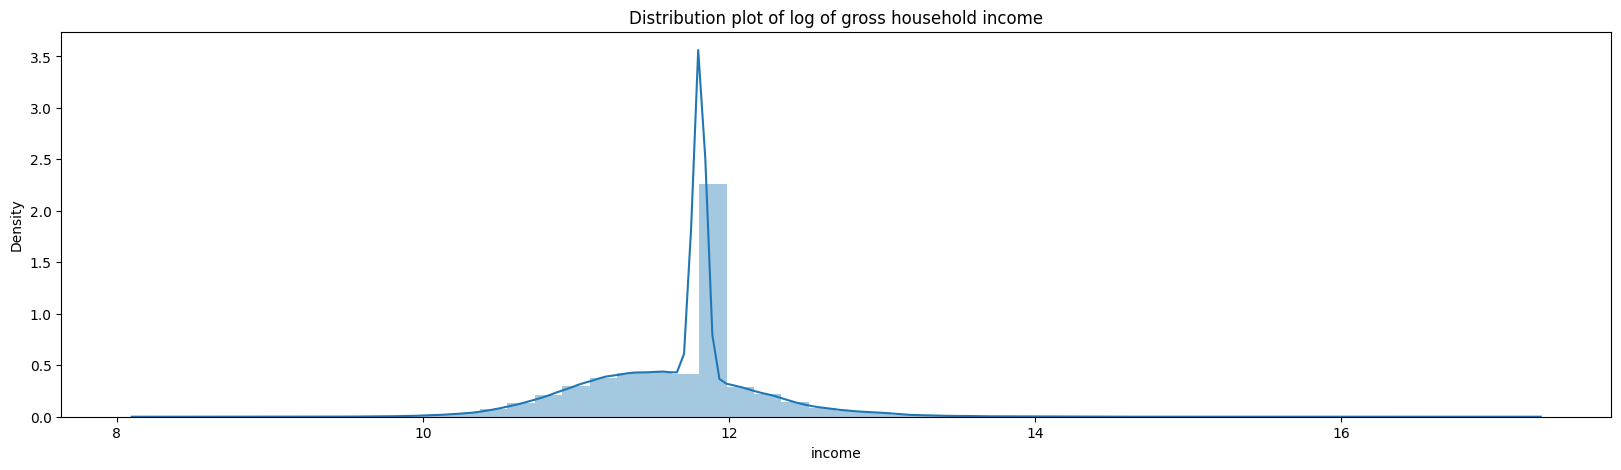

------------------------------------------------------------------------------------------------------------------------------------------------------


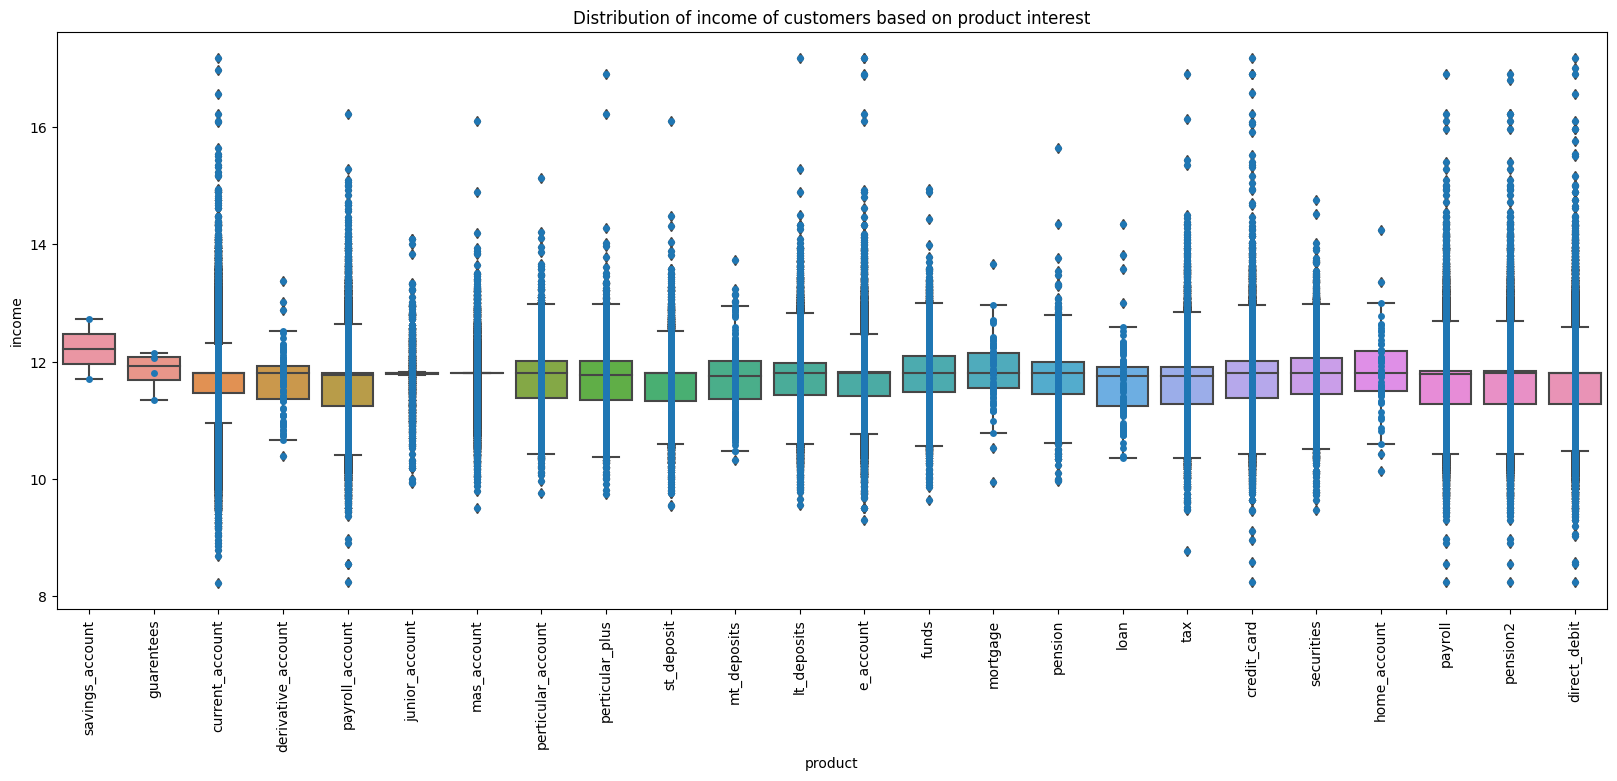

------------------------------------------------------------------------------------------------------------------------------------------------------


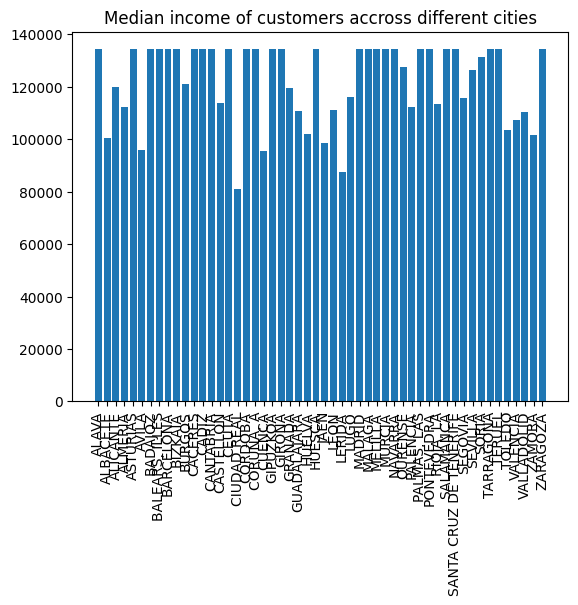

In [16]:

plt.figure(figsize=(20,5))
plt.title('Distribution plot of log of gross household income')
sn.distplot(np.log(user_features.income[~user_features.income.isna()]))
plt.show()

print('-'*150)

dummy = pd.DataFrame(columns=['income', 'product'])
for col in target_columns:
  df = pd.DataFrame({'income':np.log(user_features.income[(user_features[col] == 1) ]),
                     'product':col})
  dummy = pd.concat([dummy, df])

#Plotting distribution of income of customers based on product interest
figsize=(20,7.5)
title = 'Distribution of income of customers based on product interest'
allplots(data = dummy, title = title, kind='stripplot', figsize=figsize)

print('-'*150)


#Plotting median income of customers accross different cities
dummy = user_features[['income', 'province_name']].groupby('province_name').median()

plt.bar(range(len(dummy)), dummy.income.values)
plt.title('Median income of customers accross different cities')
plt.xticks(np.arange(len(dummy)), list(dummy.index), rotation=90)
plt.show()


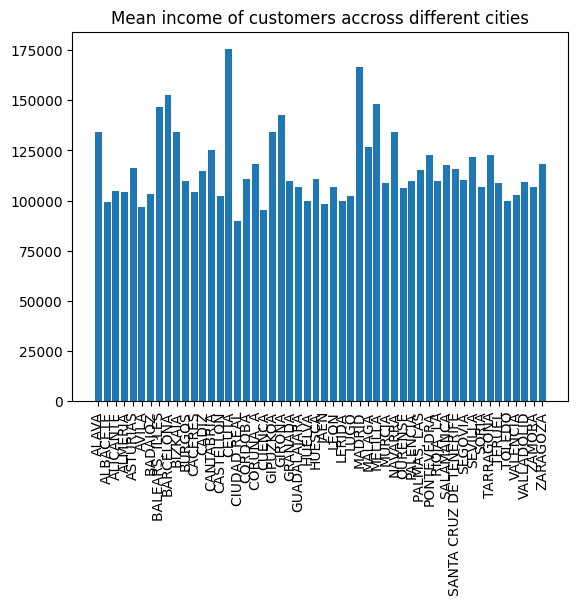

In [17]:
#Plotting mean income of customers accross different cities
dummy1 = user_features[['income', 'province_name']].groupby('province_name').mean()

plt.bar(range(len(dummy1)), dummy1.income.values)
plt.title('Mean income of customers accross different cities')
plt.xticks(np.arange(len(dummy1)), list(dummy1.index), rotation=90)
plt.show()


* Income follows log normal distribution( the peak is caused by the approache used in handling missing values)
* Median income of the customers of all the products is almost same
* if income is missing, there is a higher probability that the customer would buy juniour account or mas account or current account
* We can see income of madrid and ceuta is the highest.

**data will be trained on '2015-05-28'**

In [18]:
x=['cust_id', 'savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account',
                   'junior_account', 'mas_account', 'perticular_account', 'perticular_plus', 'st_deposit',
                   'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage', 'pension', 'loan', 'tax',
                   'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit']
df_train1505 = train[train.fetch_date == '2015-05-28']
df_train1505 = df_train1505.drop(['fetch_date'], axis=1, inplace=False)
df_train1505=df_train1505.loc[:, x]

df_train1505.shape

(631957, 25)

# Popular Recommendation System
Function that calculates the probability of a product occurring.
    Probability range is <0, 1>.

In [19]:
def popularity_based(df):
    top_col = {}
    for col in target_columns:
        counts = df[col].value_counts()
        if 1 in counts.index:
            top_col[col] = counts[1]
        else:
            top_col[col] = 0

    for k, v in top_col.items():
        top_col[k] = np.around(v / df.shape[0], decimals=4)

    return top_col
print(popularity_based(df_train1505))

{'savings_account': 0.0001, 'guarentees': 0.0, 'current_account': 0.775, 'derivative_account': 0.0005, 'payroll_account': 0.1003, 'junior_account': 0.0121, 'mas_account': 0.0112, 'perticular_account': 0.1661, 'perticular_plus': 0.0562, 'st_deposit': 0.0033, 'mt_deposits': 0.0023, 'lt_deposits': 0.0556, 'e_account': 0.1006, 'funds': 0.0239, 'mortgage': 0.0076, 'pension': 0.0117, 'loan': 0.0037, 'tax': 0.0632, 'credit_card': 0.0568, 'securities': 0.0316, 'home_account': 0.005, 'payroll': 0.0655, 'pension2': 0.0672, 'direct_debit': 0.1527}


# Memory Based - Collaborative Filtering

In [20]:
df_ui = df_train1505.copy()
df_ui = df_ui[:10000] # limited to 10k due to RAM limit
df_ui = df_ui.set_index('cust_id')
df_ui.shape

(10000, 24)

In [21]:
from sklearn.metrics.pairwise import pairwise_distances 

# create the user-item similarity matrix
# removes index names
cosine_sim = 1 - pairwise_distances(df_ui, metric="cosine")


Function that calculates recommendations for a given user.
    It uses cosine similarity to calculate the most similar users.
    Returns the probability of products for a given user based on similar users.
    Probability range is <0, 1>.

In [22]:
def useritem(user_id, df, sim_matrix = cosine_sim):
    # computes the index in the user-item similarity matrix for a given user_id
    cos_id = list(df.index).index(user_id) 
    
    # number of similar users
    k = 0
    sim_min = 0.79
    user_sim_k = {}
    
    while k < 20:
        # creates the dictionary {'similar user':'similarity'}
        for user in range(len(df)):
            
            # 0.99 because I don`t want the same user as user_id
            if sim_min < sim_matrix[cos_id, user] < 0.99:
                user_sim_k[user] = sim_matrix[cos_id, user]
                k+=1
                
        sim_min -= 0.025
        
        # if there are no users with similarity at least 0.65, the recommendation probability will be set to 0 
        if sim_min < 0.65:
            break
            
    # sorted k most similar users
    user_sim_k = dict(sorted(user_sim_k.items(), key=lambda item: item[1], reverse=True))
    user_id_k = list(user_sim_k.keys()) 
    
    # dataframe with k most similar users
    df_user_k = df.iloc[user_id_k]
    df_user_k_T = df_user_k.T
    
    # change the user index to the cosine index
    df_user_k_T.columns = user_id_k
    
    # mean of ownership by k similar users
    ownership = []
    usit = {}
    
    for row_name, row in df_user_k_T.iterrows():
        
        for indx, own in row.items():
            
            ownership.append(own) 
        
        usit[row_name] = np.mean(ownership)
        ownership = []
        
    # if there are no users with similarity at least 0.65, the recommendation probability is 0 
    if pd.isna(list(usit.values())[0]) == True:
        
        usit = {key : 0 for (key, value) in usit.items()}
            
    return usit

In [23]:
train[train['cust_id'] == 1061608].head(1)

,fetch_date,cust_id,emp_index,residence,sex,age,first_date,new_cust,seniority,is_primary,cust_type,cust_rel_type,residence_index,foreigner_index,channel,deceased,address_type,province,province_name,active_index,income,segment,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,perticular_plus,st_deposit,mt_deposits,lt_deposits,e_account,funds,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
19076,2015-01-28,1061608,N,ES,V,26.0,2012-09-17,0.0,34.0,1.0,1.0,A,S,N,KFC,N,1.0,30.0,MURCIA,0.0,94899.6,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
#testing
useritem(1061608, df_ui)

{'savings_account': 0.0,
 'guarentees': 0.0,
 'current_account': 1.0,
 'derivative_account': 0.0,
 'payroll_account': 0.0,
 'junior_account': 0.0,
 'mas_account': 0.00430416068866571,
 'perticular_account': 0.0,
 'perticular_plus': 0.0,
 'st_deposit': 0.0,
 'mt_deposits': 0.0,
 'lt_deposits': 0.03156384505021521,
 'e_account': 0.31563845050215206,
 'funds': 0.00430416068866571,
 'mortgage': 0.0,
 'pension': 0.0,
 'loan': 0.0014347202295552368,
 'tax': 0.03443328550932568,
 'credit_card': 0.011477761836441894,
 'securities': 0.00860832137733142,
 'home_account': 0.0,
 'payroll': 0.0,
 'pension2': 0.0,
 'direct_debit': 0.5882352941176471}

# Model Based - Collaborative Filtering
Collaborative Filtering is based on the analysis of user ratings. In the dataset, the rating is information about the product ownership (1 or 0). In model based technique recommendations are based on machine learning models. The model is built on the matrix ownership of products by consumers.

In [25]:
df_mb = df_train1505.copy()
df_mb = df_mb.set_index('cust_id')

In [26]:
df_val1603 = train[train.fetch_date == '2016-03-28']
df_val1603 = df_val1603.drop(['fetch_date'], axis=1, inplace=False)
df_val1603 = df_val1603.set_index('cust_id')

In [27]:
from sklearn.tree import DecisionTreeClassifier

Function that calculates recommendations for a given user.
    It uses machine learning model to calculate the probability of products.
    Probability range is <0, 1>.

In [28]:
def modelbased(user_id, df, model=DecisionTreeClassifier(max_depth=9)):
    mdbs = {}
    
    for c in df.columns:
        y_train = df[c].astype('int')
        x_train = df.drop([c], axis = 1)
        model.fit(x_train, y_train)
        p_train = model.predict_proba(x_train[x_train.index == user_id])[:,1]
        
        mdbs[c] = p_train[0]
        
    return mdbs

In [29]:
modelbased(1061608, df_mb)

{'savings_account': 2.0143710989545413e-05,
 'guarentees': 0.0,
 'current_account': 0.9354946617944848,
 'derivative_account': 0.00019134466093726082,
 'payroll_account': 0.00026302086100808724,
 'junior_account': 3.0062710814759588e-06,
 'mas_account': 0.006624955043928504,
 'perticular_account': 0.11178726596000622,
 'perticular_plus': 0.02026298551515136,
 'st_deposit': 0.0026920204617169306,
 'mt_deposits': 0.0006220816686659199,
 'lt_deposits': 0.01911984941538546,
 'e_account': 0.03153603373338318,
 'funds': 0.004927893732809265,
 'mortgage': 0.00023275532427804286,
 'pension': 0.001406974657086115,
 'loan': 0.0016418788567050227,
 'tax': 0.009584422251260034,
 'credit_card': 0.005536443775532144,
 'securities': 0.008798761904495373,
 'home_account': 0.0013513549041826276,
 'payroll': 0.0,
 'pension2': 1.1663412574558364e-05,
 'direct_debit': 0.06420341448476496}

# Weighted Hybrid Recommendation System
Hybrid recommender systems are based on a combination of individual recommender systems. This reduces the disadvantages of various types of systems, and thus increases the effectiveness of recommendations. One type of hybrid recommendation system is the weighted hybrid recommendation system. It works by combining all the results from individual recommendation systems using specific weightings

Function that calculates weighted hybrid recommendations for a given user.
    It uses weights to calculate the probability of products.

In [30]:
def hybrid(user_id, df_p, df_u, df_m, f1, f2, f3):
    pb_h = popularity_based(df_p)
    ui_h = useritem(user_id, df_u)
    mb_h =  modelbased(user_id, df_m)

    hybrid = {}
    for k, v in pb_h.items():
        hybrid[k] = (v * f1) + (ui_h[k] * f2) + (mb_h[k] * f3)
    
    return hybrid

In [31]:
hybrid_rec_1061608 = hybrid(1061608, df_p = df_train1505, df_u = df_ui, df_m = df_mb, f1 = 0.25, f2 = 0.25, f3 = 0.5)
hybrid_rec_1061608

{'savings_account': 3.507185549477271e-05,
 'guarentees': 0.0,
 'current_account': 0.9114973308972424,
 'derivative_account': 0.00022067233046863042,
 'payroll_account': 0.025206510430504044,
 'junior_account': 0.0030265031355407378,
 'mas_account': 0.00718851769413068,
 'perticular_account': 0.09741863298000311,
 'perticular_plus': 0.02418149275757568,
 'st_deposit': 0.0021710102308584653,
 'mt_deposits': 0.00088604083433296,
 'lt_deposits': 0.03135088597024653,
 'e_account': 0.1198276294922296,
 'funds': 0.00951498703857106,
 'mortgage': 0.0020163776621390213,
 'pension': 0.0036284873285430575,
 'loan': 0.0021046194857413207,
 'tax': 0.029200532502961438,
 'credit_card': 0.019837662346876547,
 'securities': 0.014451461296580542,
 'home_account': 0.0019256774520913138,
 'payroll': 0.016375,
 'pension2': 0.01680583170628728,
 'direct_debit': 0.21733553077179424}

# Get Recommendation
Returns a list of recommendations for a given user.

In [32]:
def recommendation(user_id, df, hybrid_outcome):
    # products that the user already owns
    user_row = df[df.index == user_id]
    user_products = list(filter(lambda product: user_row[product].to_numpy()[0]==1, user_row))
                
    # removes products that the user already owns
    recom = { key : hybrid_outcome[key] for key in hybrid_outcome if key not in user_products}

    recom_sort = dict(sorted(recom.items(), key=lambda item: item[1], reverse=True))
    
    return list(recom_sort.keys())

In [33]:
rec_1061608 = recommendation(1061608, df_mb, hybrid_rec_1061608)
print(rec_1061608)

['direct_debit', 'e_account', 'perticular_account', 'lt_deposits', 'tax', 'payroll_account', 'perticular_plus', 'credit_card', 'pension2', 'payroll', 'securities', 'funds', 'mas_account', 'pension', 'junior_account', 'st_deposit', 'loan', 'mortgage', 'home_account', 'mt_deposits', 'derivative_account', 'savings_account', 'guarentees']


# Evaluation
In the evaluation, I use the average precision metric for 7 products. This metric checks the validity of the recommendations and the correctness of their position on the list of recommendations. The product with the highest probability of purchase is placed first in the list.

In [34]:
df_test1605 = train[train.fetch_date == '2016-05-28']
df_test1605 = df_test1605.drop(['fetch_date'], axis=1, inplace=False)
df_test1605.head()

,cust_id,emp_index,residence,sex,age,first_date,new_cust,seniority,is_primary,cust_type,cust_rel_type,residence_index,foreigner_index,channel,deceased,address_type,province,province_name,active_index,income,segment,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,perticular_plus,st_deposit,mt_deposits,lt_deposits,e_account,funds,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
12715856,657640,N,ES,H,68.0,2006-11-17,0.0,114.0,1.0,1,I,S,N,KAQ,N,1.0,28.0,MADRID,0.0,147347.970000,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12715857,657788,N,ES,H,42.0,2006-11-18,0.0,114.0,1.0,1,A,S,N,KBF,N,1.0,28.0,MADRID,1.0,132559.350000,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12715858,657795,N,ES,V,44.0,2006-11-18,0.0,114.0,1.0,1,A,S,N,KAP,N,1.0,26.0,"RIOJA, LA",1.0,81399.570000,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12715859,657790,N,ES,V,42.0,2006-11-18,0.0,114.0,1.0,1,A,S,N,KBF,N,1.0,48.0,BIZKAIA,1.0,134254.318238,02 - PARTICULARES,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1
12715860,657794,N,ES,H,49.0,2006-11-18,0.0,114.0,1.0,1,A,S,N,KAT,N,1.0,8.0,BARCELONA,1.0,102189.000000,01 - TOP,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Function that returns a list of test recommendations for a given user.

In [35]:
def rec_test(user_id, df1, df2):
    recom_test = []
    
    data_before = df1[df1.cust_id == user_id].values[0]
    data_after = df2[df2.cust_id == user_id].values[0]
    
    for i, col in enumerate(df1.columns[1:]):    
        if data_before[i+1] == 0 and data_after[i+1] == 1:
            recom_test.append(col)

    return recom_test

In [36]:
rec_test_1061608 = rec_test(1061608, df_train1505, df_test1605)
rec_test_1061608

['perticular_account', 'perticular_plus', 'mortgage', 'tax', 'pension2']

Function that returns the average precision metric for a given user.

In [37]:
def apk(actual, predicted, k=7):
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)


In [38]:
def evaluation(user_id, f1, f2, f3):
    y_real = rec_test(user_id, df_train1505, df_test1605)
    y_pred = recommendation(user_id, df_mb,
                            hybrid_outcome = hybrid(user_id, df_u = df_ui, df_m = df_mb,
                                                    df_p = df_train1505,
                                                    f1 = f1, f2 = f2, f3 = f3))
    return apk(y_real, y_pred)


In [39]:
evaluation(1061608, f1 = 0.8, f2=0.5, f3=0.2)

0.2323809523809524

testing on another cust

In [40]:
top_g=1061283

In [41]:
train[train['cust_id'] == top_g].head(1)

,fetch_date,cust_id,emp_index,residence,sex,age,first_date,new_cust,seniority,is_primary,cust_type,cust_rel_type,residence_index,foreigner_index,channel,deceased,address_type,province,province_name,active_index,income,segment,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,perticular_plus,st_deposit,mt_deposits,lt_deposits,e_account,funds,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
19272,2015-01-28,1061283,N,ES,H,22.0,2012-09-17,0.0,34.0,1.0,1.0,I,S,N,KHE,N,1.0,28.0,MADRID,0.0,155917.08,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
x=['cust_id', 'savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account',
                   'junior_account', 'mas_account', 'perticular_account', 'perticular_plus', 'st_deposit',
                   'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage', 'pension', 'loan', 'tax',
                   'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit']
df_train1505 = train[train.fetch_date == '2015-05-28']
df_train1505 = df_train1505.drop(['fetch_date'], axis=1, inplace=False)
df_train1505=df_train1505.loc[:, x]

df_train1505.shape

(631957, 25)

In [43]:

useritem(top_g, df_ui)
modelbased(top_g, df_mb)
hybrid_rec_top_g = hybrid(top_g, df_p = df_train1505, df_u = df_ui, df_m = df_mb, f1 = 0.5, f2 = 0.25, f3 = 0.25)
hybrid_rec_top_g
sdss=recommendation(top_g, df_mb, hybrid_rec_top_g)[0:5]
print("the top 5 recommended products are :")
print(sdss)


the top 5 recommended products are :
['direct_debit', 'e_account', 'perticular_account', 'payroll_account', 'tax']


In [44]:
evaluation(top_g, f1 = 0.8, f2=0.5, f3=0.2)

0.15476190476190477

--------------------------------------------------------------------------------------------------------------------------------

---------

----